<img src="Escudo_uaustralchile.png" style="height=100px;display: block;margin-left:auto;margin-right:auto"/>

# Integrantes:
+ Kamila Gamboa (kamila dot gamboa at alumnos dot uach dot cl)
+ Valentina Valderas (valentina dot valderas at alumnos dot uach dot cl)

# Profesor y ayudante:
+ Victor Poblete
+ Esteban Vargas

# Fecha:
+ 19 de Julio del 2024

# Objetivos:
> + Explicar el proceso de ventaneo de una señal.
> + Crear una función que divida una señal en frames (ventanas).
> + Aplicar Transformada rápida de Fourier (Fast Fourier Transform (FFT)) a frames de la señal.
> + Realizar ventaneo y aplicar funciones correspondientes a diferentes tipos de audios.

# Tarea:
>+ #### 1) Abrir un audio en formato wav.
>+ #### 2) Plotear la forma de onda temporal.
>+ #### 3) Ventanear la señal de audio:
    >>+ #### 3.1) Definir una función.
    >>+ #### 3.2) Definir el largo del "FRAME".
    >>+ #### 3.3) Definir el porcentaje de traslape.
    >>+ #### 3.4) Seleccionar la función de ventana de largo igual al largo del frame.
    >>+ #### 3.5) Aplicar la función de ventaneo para dividir en frames y aplicar la función de ventana a todos los frames.
>+ #### 4) Usar la fft e ilustrar el cálculo para un solo frame:
    >>+ #### 4.1) Aplicar la FFT a toda la matriz de frames.
    >>+ #### 4.2) Plotear la magnitud de T.F en función de la frecuencia en Hz.
>+ #### 5) Seleccionar 3 tipos de audios: 1 biófono, 1 antropófono y 1 geófono; + 1 de preferencia.
>+ #### 6) Seleccionar algunos frames interesantes y plotearlos:
    >>+ #### 6.1) Forma de onda temporal.
    >>+ #### 6.2) Su espectro.
>+ #### 7) Comparar y analizar resultados.  

# Desarrollo
+ Para poder realizar el ventaneo y posteriormente aplicar la FFT se importan las librerias necesarias.

In [77]:
import numpy as np
import librosa as lib
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import signal
from scipy.fft import fft,ifft,fftshift

### 1) Audio formato wav.
+ Para poder explicar el ventaneo y la transformada rápida de fourier, se necesita una señal de ejemplo. En este caso, se utilizará un audio.

In [78]:
sig,fs=lib.load("voice-near.wav",sr=44100)

### 2) Forma de onda temporal.
+ La señal elegida, tiene el siguiente plot.

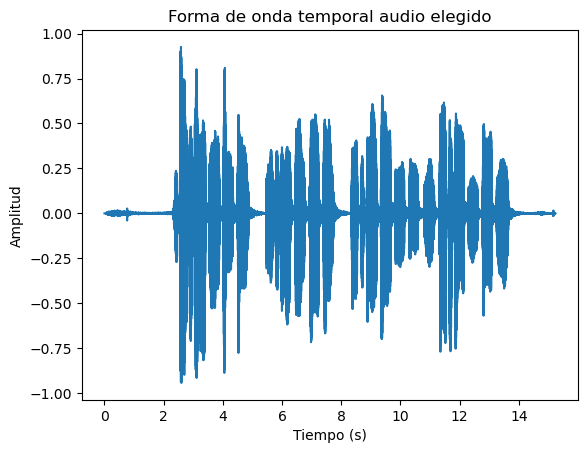

In [79]:
t=np.linspace(0,len(sig)/fs,len(sig))  #Transformando las muestras en tiempo (s)
plt.plot(t,sig);
plt.title("Forma de onda temporal audio elegido");
plt.xlabel("Tiempo (s)");
plt.ylabel("Amplitud");

### 3) Ventanear
+ Ventanear es dividir la señal en frames o ventanas, es decir, en diferentes secciones de un mismo tamaño.
+ Para ello se necesita de una función.

In [80]:
# 3.1) Definir función

def frames(x,nfft,overlap):
    x=x.tolist()
    num_f=int(round(len(x)/(nfft-(nfft*overlap))))  #Número de frames
    print(num_f)
    matriz_frames=[]
    for i in range(num_f):    #Recorre cada frame
        frame=x[i*round(nfft*overlap):i*round(nfft*overlap)+nfft]
        while len(frame)<nfft:
            frame.append(0)     #Agrega ceros, al final, cuando un frame no tiene datos suficientes para quedar de largo nfft, hasta que cuadre.
        matriz_frames.append(frame)
    matf=np.array(matriz_frames)
    return matf

+ Ahora, como muestra la función, se necesita de 3 variables; la señal, el largo del que se quiere cada ventana (nfft) y el porcentaje de traslape (overlap).
+ Además, para suavizar cada frame, con el fin de que no se duplique información, se necesita una función ventana (window). En este caso se utilizará la función de Hann para el mismo largo de cada frame (nfft).

In [81]:
# 3.2) Definir largo del FRAME

nfft=1024
# 3.3) Definir % traslape. Corresponde al % de información que se toma del frame anterior.
overlap=0.5
# 3.4) Seleccionar función ventana
window = signal.windows.hann(nfft)

+ Ya teniendo la función y habiendo fijado los valores de las variables, se aplica la función de ventaneo para dividir en frames y la función de ventana, que "suaviza" el inicio y final de cada frame, a todos los frames.

In [82]:
# 3.5) Aplicar función

sig_frames=frames(sig,nfft,overlap)
matriz_frames=np.multiply(sig_frames,window)

1312


+ Ahora se puede graficar un frame de la señal con la función ventana. En este caso, se utilizará como ejemplo el frame 600.

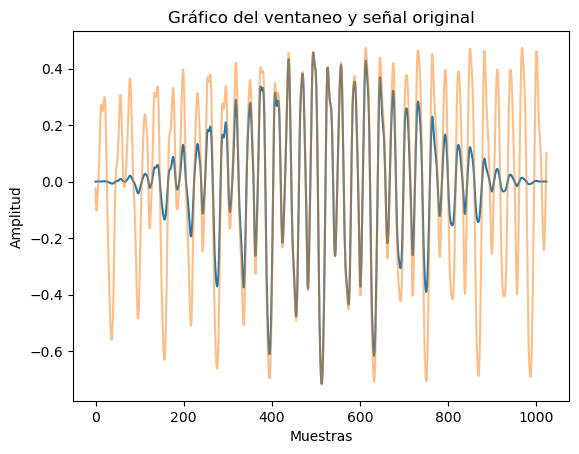

In [83]:
frame=600

#Gráfico azul: Ventaneo
plt.plot(matriz_frames[frame])

#Gráfico naranja: Señal original
plt.plot(sig_frames[600],alpha=0.5);
plt.title("Gráfico del ventaneo y señal original")
plt.xlabel("Muestras");
plt.ylabel("Amplitud");

## 4) Usar FFT
+ Ahora, se puede aplicar la transformada rápida de Fourier a cada frame de la siguiente forma.
+ La FFT sirve para obtener el contenido de frecuencia de una señal. Pasa la información de esta del dominio del tiempo discreto a frecuencia. Posteriormente el resultado puede ser graficado en un espectrograma.

In [84]:
# 4.1) Aplicar FFT

matrizfft=fft(matriz_frames,n=nfft,axis=1)

+ En esta nueva matriz, se calcula la magnitud de cada frame.

In [85]:
magmatrizfft=np.abs(matrizfft)

+ Finalmente, se puede graficar el espectrograma del frame seleccionado anteriormente.

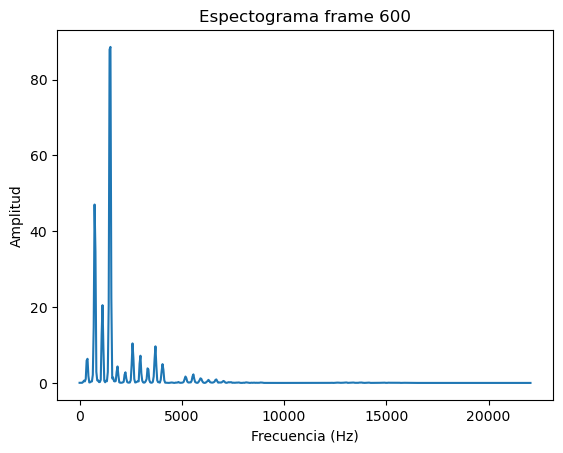

In [86]:
# 4.2) Plotear la magnitud

b=np.linspace(0,fs//2,nfft//2)
plt.plot(b,magmatrizfft[frame,0:nfft//2]);
plt.title("Espectograma frame 600")
plt.xlabel("Frecuencia (Hz)");
plt.ylabel("Amplitud");

+ Además, se puede graficar el espectrograma de toda la señal de audio.

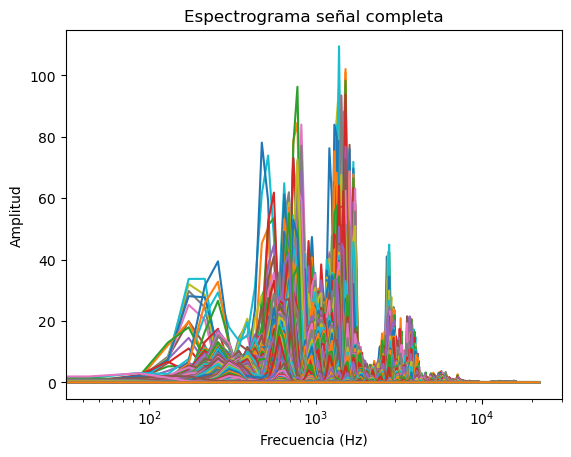

In [87]:
magmatrizfftmitad=magmatrizfft[:,0:nfft//2]
fig,ax = plt.subplots(1,1)
ax.plot(b,magmatrizfftmitad.T);
ax.set_xscale("log");
ax.set_title("Espectrograma señal completa")
ax.set_xlabel("Frecuencia (Hz)");
ax.set_ylabel("Amplitud");

## 5) Seleccionar audios
+ #### Biófono: Ladrido de perro
+ #### Antropófono: Bocina de tren
+ #### Geófono: Trueno
+ #### Extra: Violín

In [88]:
#Ladrido de perro
Audio("dog_bark.wav")

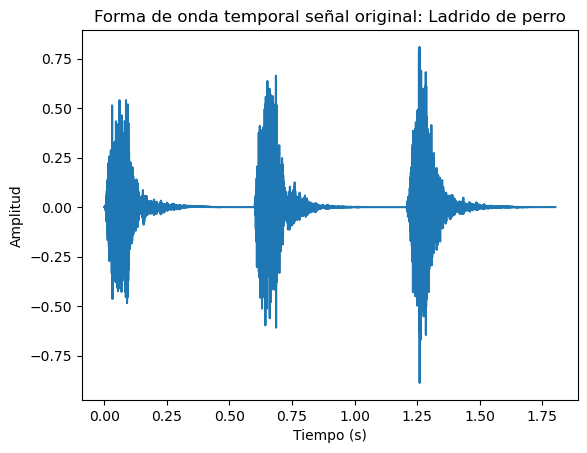

In [89]:
sig1,fs=lib.load("dog_bark.wav",sr=44100)

t1=np.linspace(0,len(sig1)/fs,len(sig1))
plt.plot(t1,sig1);
plt.title("Forma de onda temporal señal original: Ladrido de perro")
plt.xlabel("Tiempo (s)");
plt.ylabel("Amplitud");

In [90]:
# Definir largo del FRAME
nfft1=1024
# Seleccionar función ventana
window1 = signal.windows.hann(nfft1)

# Aplicar función
sig1_frames=frames(sig1,nfft1,overlap)
matriz1_frames=np.multiply(sig1_frames,window1)

155


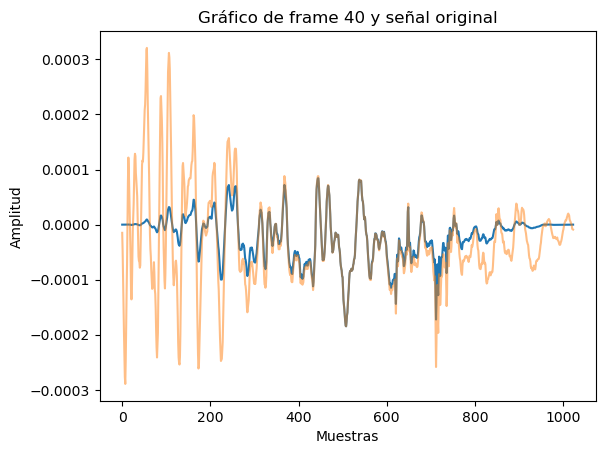

In [91]:
frame1=40
plt.plot(matriz1_frames[frame1])    #Gráfico azul: frame 40
plt.plot(sig1_frames[frame1],alpha=0.5);   #Gráfico naranja: Señal original
plt.title("Gráfico de frame 40 y señal original")
plt.xlabel("Muestras");
plt.ylabel("Amplitud");

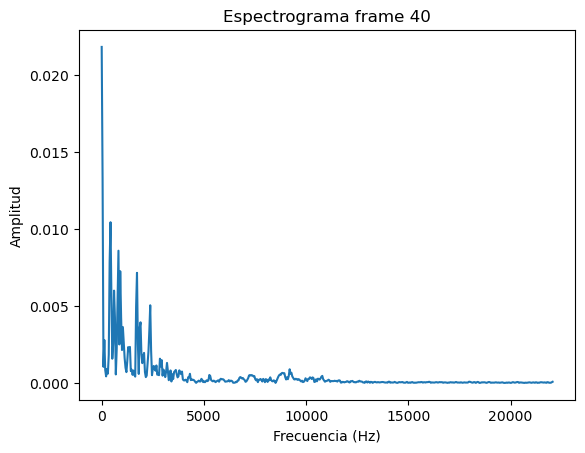

In [92]:
#Aplicar FFT
matrizfft1=fft(matriz1_frames,n=nfft1,axis=1)
#Magnitud
magmatrizfft1=np.abs(matrizfft1)
#Espectograma
d=np.linspace(0,fs//2,nfft1//2)
plt.plot(d,magmatrizfft1[frame1,0:nfft1//2]);
plt.title("Espectrograma frame 40")
plt.xlabel("Frecuencia (Hz)");
plt.ylabel("Amplitud");

In [93]:
#Bocina de tren
Audio("train_horn.wav")

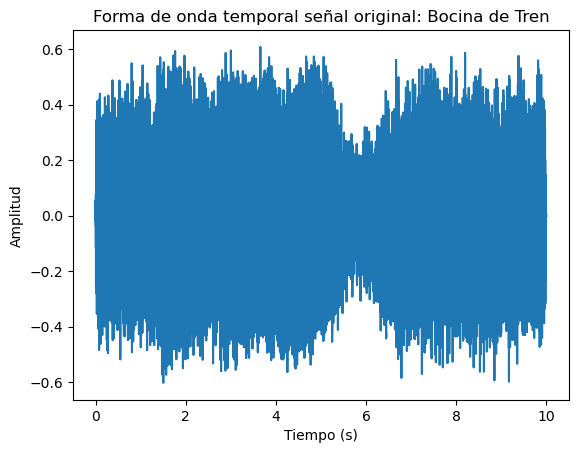

In [94]:
sig2,fs=lib.load("train_horn.wav",sr=44100)

t2=np.linspace(0,len(sig2)/fs,len(sig2))
plt.plot(t2,sig2);
plt.title("Forma de onda temporal señal original: Bocina de Tren")
plt.xlabel("Tiempo (s)");
plt.ylabel("Amplitud");

In [95]:
# Definir largo del FRAME
nfft2=1024
# Seleccionar función ventana
window2 = signal.windows.hann(nfft2)

# Aplicar función
sig2_frames=frames(sig2,nfft2,overlap)
matriz2_frames=np.multiply(sig2_frames,window2)

862


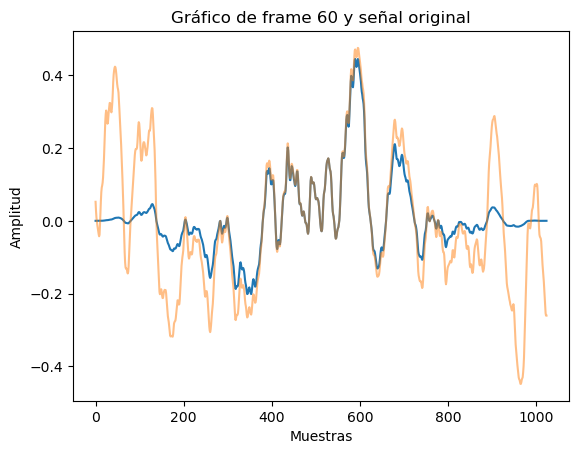

In [96]:
frame2=60
plt.plot(matriz2_frames[frame2])   #Gráfico azul: frame 60
plt.plot(sig2_frames[frame2],alpha=0.5);   #Gráfico naranja: Señal original
plt.title("Gráfico de frame 60 y señal original")
plt.xlabel("Muestras");
plt.ylabel("Amplitud");

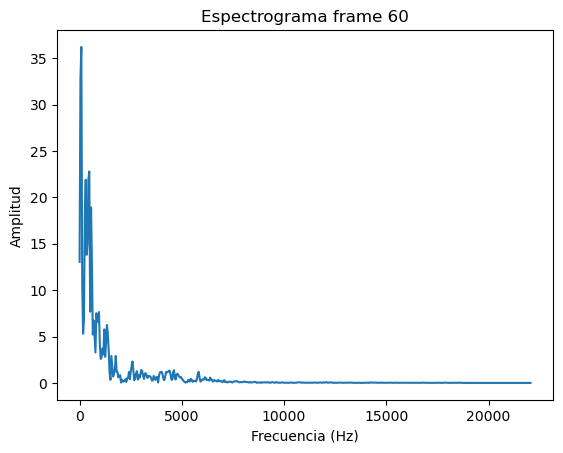

In [97]:
#Aplicar FFT
matrizfft2=fft(matriz2_frames,n=nfft2,axis=1)
#Magnitud
magmatrizfft2=np.abs(matrizfft2)
#Espectograma
h=np.linspace(0,fs//2,nfft2//2)
plt.plot(h,magmatrizfft2[frame2,0:nfft2//2]);
plt.title("Espectrograma frame 60")
plt.xlabel("Frecuencia (Hz)");
plt.ylabel("Amplitud");

In [98]:
#Trueno
Audio("thunder.wav")

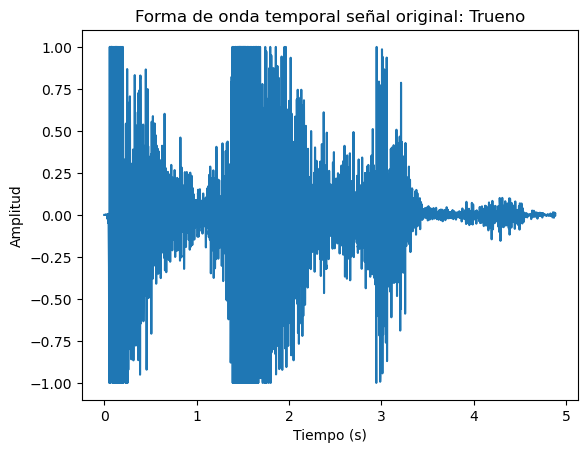

In [99]:
sig3,fs=lib.load("thunder.wav",sr=44100)

t3=np.linspace(0,len(sig3)/fs,len(sig3))
plt.plot(t3,sig3);
plt.title("Forma de onda temporal señal original: Trueno")
plt.xlabel("Tiempo (s)");
plt.ylabel("Amplitud");

In [100]:
# Definir largo del FRAME
nfft3=1024
# Seleccionar función ventana
window3 = signal.windows.hann(nfft3)

# Aplicar función
sig3_frames=frames(sig3,nfft3,overlap)
matriz3_frames=np.multiply(sig3_frames,window3)

421


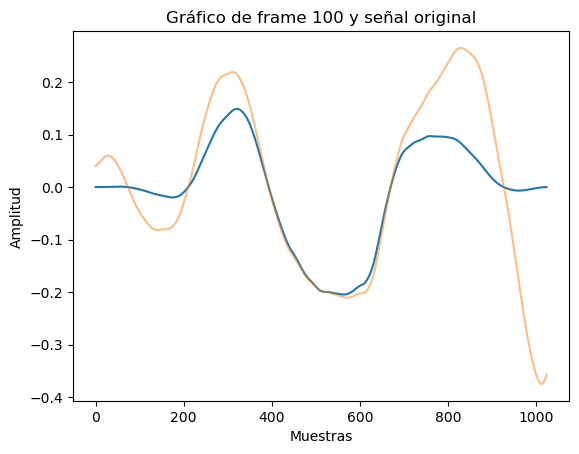

In [101]:
frame3=100
plt.plot(matriz3_frames[frame3])   #Gráfico azul: frame 100
plt.plot(sig3_frames[frame3],alpha=0.5);   #Gráfico naranja: Señal original
plt.title("Gráfico de frame 100 y señal original")
plt.xlabel("Muestras");
plt.ylabel("Amplitud");

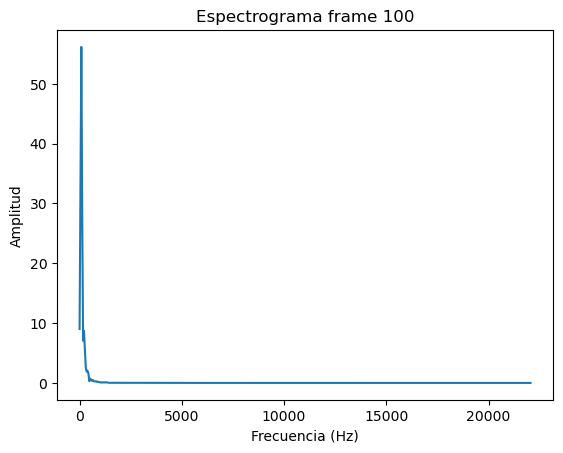

In [102]:
#Aplicar FFT
matrizfft3=fft(matriz3_frames,n=nfft3,axis=1)
#Magnitud
magmatrizfft3=np.abs(matrizfft3)
#Espectograma
c=np.linspace(0,fs//2,nfft3//2)
plt.plot(c,magmatrizfft3[frame3,0:nfft3//2]);
plt.title("Espectrograma frame 100")
plt.xlabel("Frecuencia (Hz)");
plt.ylabel("Amplitud");

In [103]:
#Violin
Audio("violin.wav")

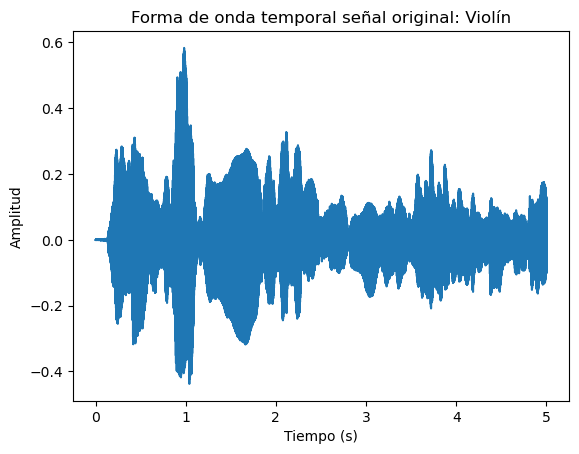

In [104]:
sig4,fs=lib.load("violin.wav",sr=44100)

t4=np.linspace(0,len(sig4)/fs,len(sig4))
plt.plot(t4,sig4);
plt.title("Forma de onda temporal señal original: Violín")
plt.xlabel("Tiempo (s)");
plt.ylabel("Amplitud");

In [105]:
# Definir largo del FRAME
nfft4=1024
# Seleccionar función ventana
window4 = signal.windows.hann(nfft4)

# Aplicar función
sig4_frames=frames(sig4,nfft4,overlap)
matriz4_frames=np.multiply(sig4_frames,window4)

431


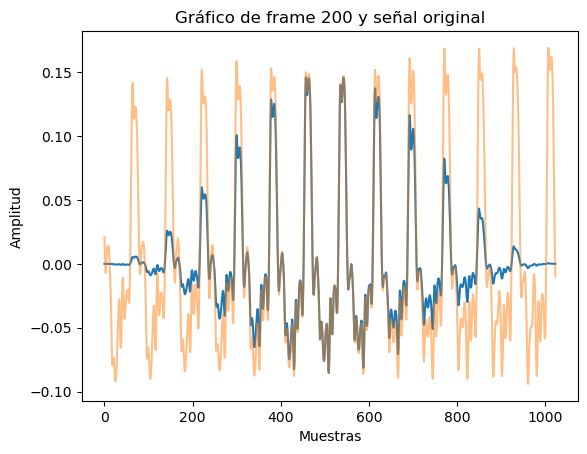

In [106]:
frame4=200
plt.plot(matriz4_frames[frame4])   #Gráfico azul: frame 200
plt.plot(sig4_frames[frame4],alpha=0.5);  #Gráfico naranja: Señal original
plt.title("Gráfico de frame 200 y señal original")
plt.xlabel("Muestras");
plt.ylabel("Amplitud");

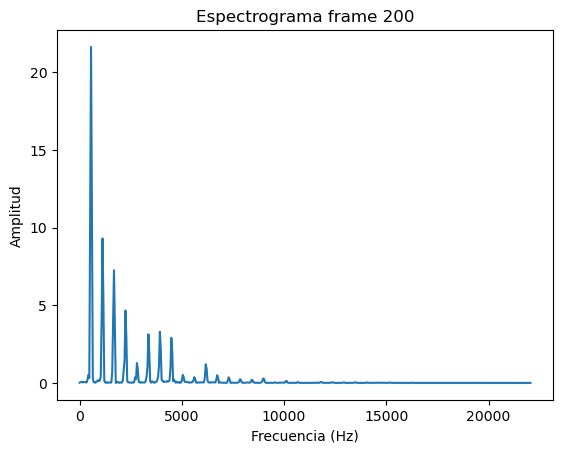

In [107]:
#Aplicar FFT
matrizfft4=fft(matriz4_frames,n=nfft4,axis=1)
#Magnitud
magmatrizfft4=np.abs(matrizfft4)
#Espectograma
v=np.linspace(0,fs//2,nfft4//2)
plt.plot(v,magmatrizfft4[frame4,0:nfft4//2]);
plt.title("Espectrograma frame 200")
plt.xlabel("Frecuencia (Hz)");
plt.ylabel("Amplitud");

## 6) Seleccionar frames

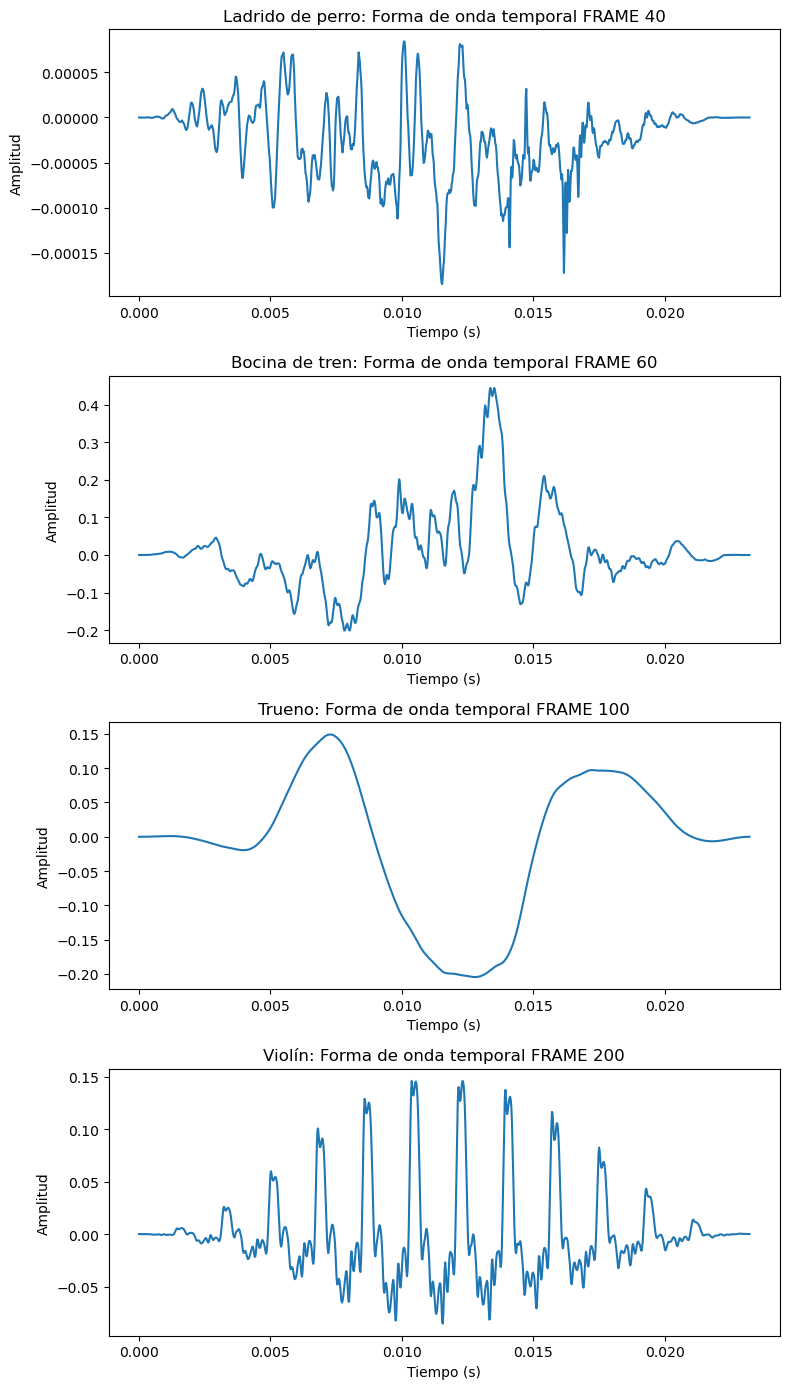

In [108]:
# 6.1) Forma de onda temporal

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8,14))
#Ladrido de perro
frame1=40
ts1=np.linspace(0,len(matriz1_frames[frame1])/fs,len(matriz1_frames[frame1]))
axs[0].plot(ts1,matriz1_frames[frame1]);
axs[0].set_title("Ladrido de perro: Forma de onda temporal FRAME 40");
axs[0].set_xlabel("Tiempo (s)");
axs[0].set_ylabel("Amplitud");

#Bocina de tren
frame2=60
ts2=np.linspace(0,len(matriz2_frames[frame2])/fs,len(matriz2_frames[frame2]))
axs[1].plot(ts2,matriz2_frames[frame2]);
axs[1].set_title("Bocina de tren: Forma de onda temporal FRAME 60");
axs[1].set_xlabel("Tiempo (s)");
axs[1].set_ylabel("Amplitud");

#Trueno
frame3=100
ts3=np.linspace(0,len(matriz3_frames[frame3])/fs,len(matriz3_frames[frame3]))
axs[2].plot(ts3,matriz3_frames[frame3]);
axs[2].set_title("Trueno: Forma de onda temporal FRAME 100");
axs[2].set_xlabel("Tiempo (s)");
axs[2].set_ylabel("Amplitud");

#Violin
frame4=200
ts4=np.linspace(0,len(matriz4_frames[frame4])/fs,len(matriz4_frames[frame4]))
axs[3].plot(ts4,matriz4_frames[frame4]);
axs[3].set_title("Violín: Forma de onda temporal FRAME 200");
axs[3].set_xlabel("Tiempo (s)");
axs[3].set_ylabel("Amplitud");

fig.tight_layout()

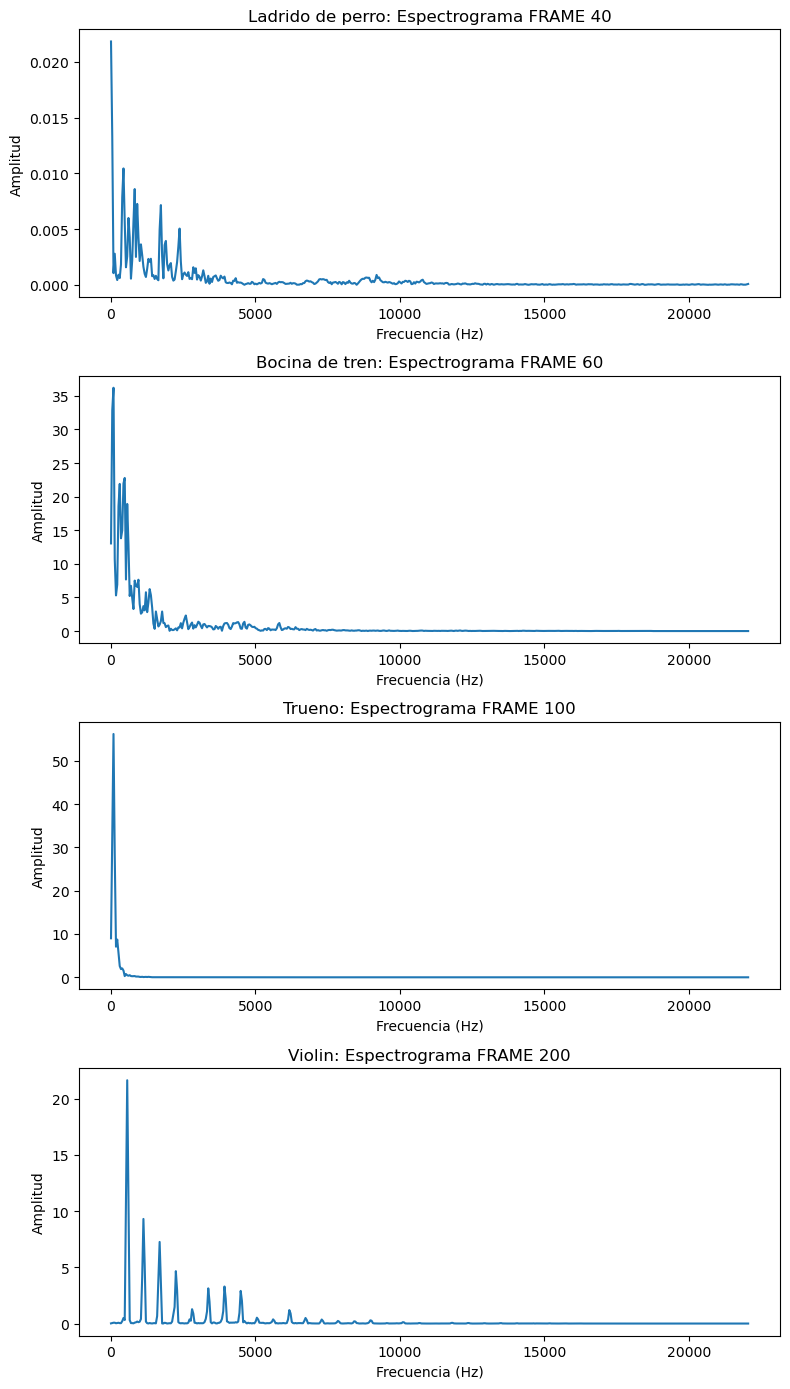

In [109]:
# 6.2) Espectrograma

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8,14))
#Ladrido de perro
frame1=40
b1=np.linspace(0,fs//2,nfft1//2)
axs[0].plot(b1,magmatrizfft1[frame1,0:nfft1//2]);
axs[0].set_title("Ladrido de perro: Espectrograma FRAME 40");
axs[0].set_xlabel("Frecuencia (Hz)");
axs[0].set_ylabel("Amplitud");

#Bocina de tren
frame2=60
b2=np.linspace(0,fs//2,nfft2//2)
axs[1].plot(b2,magmatrizfft2[frame2,0:nfft2//2]);
axs[1].set_title("Bocina de tren: Espectrograma FRAME 60");
axs[1].set_xlabel("Frecuencia (Hz)");
axs[1].set_ylabel("Amplitud");

#Trueno
frame3=100
b3=np.linspace(0,fs//2,nfft3//2)
axs[2].plot(b3,magmatrizfft3[frame3,0:nfft3//2]);
axs[2].set_title("Trueno: Espectrograma FRAME 100");
axs[2].set_xlabel("Frecuencia (Hz)");
axs[2].set_ylabel("Amplitud");

#Violin
frame4=200
b4=np.linspace(0,fs//2,nfft4//2)
axs[3].plot(b4,magmatrizfft4[frame4,0:nfft4//2]);
axs[3].set_title("Violin: Espectrograma FRAME 200");
axs[3].set_xlabel("Frecuencia (Hz)");
axs[3].set_ylabel("Amplitud");

fig.tight_layout()

## 7) Comparar y analizar resultados
+ En el espectrograma del ladrido del perro se ve que tiene una amplitud muy pequeña, por lo tanto presenta menos energía en comparación con los demás tipos de audios.
+ Se puede observar que la forma de onda de la bocina de tren tiene una amplitud más grande y constante, en comparación con los demás audios.
+ El espectrograma del trueno demuestra que este sonido se concentra en las bajas frecuencias.
+ Se aprecia que tanto la forma de onda como el espectrograma del violín siguen patrones, lo que provoca formas curiosas que no están presentes en los gráficos de los demás audios.
+ En el espectrograma del violin se observa claramente una fundamental y sus armónicos.
+ En conclusión, al ser audios de distinto origen, se obtienen formas de onda y espectrogramas muy diferentes entre sí.

# Referencias
Para más información, se recomienda este libro: 
+ Oppenheim, A. V., Schafer, R., W. (2000). $ \textit {Tratamiento de Señales en Tiempo Discreto. (Segunda Edición)} $. Prentice Hall, Madrid.